In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
import io
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
firm_df = pd.read_csv('Firm_level_data.csv').drop('Unnamed: 0',axis=1)

In [3]:
firm_df.shape

(759, 9)

In [4]:
firm_df.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [5]:
firm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    object 
 6   tobinq        738 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 53.5+ KB


In [6]:
firm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,759.0,2689.705158,8722.060124,0.138000,122.920000,448.577082,1822.547366,135696.788200
capital,759.0,1977.747498,6466.704896,0.057000,52.650501,202.179023,1075.790020,93625.200560
patents,759.0,25.831357,97.259577,0.000000,1.000000,3.000000,11.500000,1220.000000
randd,759.0,439.938074,2007.397588,0.000000,4.628262,36.864136,143.253403,30425.255860
employment,759.0,14.164519,43.321443,0.006000,0.927500,2.924000,10.050001,710.799925
tobinq,738.0,2.794910,3.366591,0.119001,1.018783,1.680303,3.139309,20.000000
value,759.0,2732.734750,7071.072362,1.971053,103.593946,410.793529,2054.160386,95191.591160
institutions,759.0,43.020540,21.685586,0.000000,25.395000,44.110000,60.510000,90.150000


In [7]:
firm_df.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

In [8]:
for column in firm_df.columns:
    if firm_df[column].dtype != 'object':
        median = firm_df[column].median()
        firm_df[column] = firm_df[column].fillna(median)

firm_df.isnull().sum()

sales           0
capital         0
patents         0
randd           0
employment      0
sp500           0
tobinq          0
value           0
institutions    0
dtype: int64

In [9]:
dups = firm_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

firm_df[dups]

Number of duplicate rows = 0


,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions


In [10]:
firm_df.sp500.replace(['no','yes'],[False,True],inplace=True)

In [11]:
firm_df.sp500.astype("object")

0      False
1      False
2       True
3      False
4      False
       ...  
754     True
755    False
756    False
757     True
758    False
Name: sp500, Length: 759, dtype: object

In [12]:
firm_df = pd.get_dummies(firm_df, columns=['sp500'],drop_first=True)

In [13]:
firm_df.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500_True
0,826.995050,161.603986,10,382.078247,2.306000,11.049511,1625.453755,80.27,0
1,407.753973,122.101012,2,0.000000,1.860000,0.844187,243.117082,59.02,0
2,8407.845588,6221.144614,138,3296.700439,49.659005,5.205257,25865.233800,47.70,1
3,451.000010,266.899987,1,83.540161,3.071000,0.305221,63.024630,26.88,0
4,174.927981,140.124004,2,14.233637,1.947000,1.063300,67.406408,49.46,0


<Axes: xlabel='sp500_True', ylabel='count'>

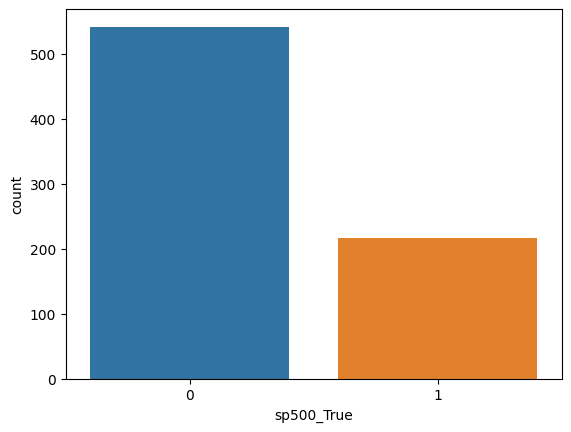

In [14]:
sns.countplot(x= firm_df["sp500_True"])

In [15]:
pd.set_option('display.max_columns', None)
firm_df[['sales', 'capital', 'patents', 'randd', 'employment', 'tobinq', 'value', 'institutions']].corr()

,sales,capital,patents,randd,employment,tobinq,value,institutions
sales,1.000000,0.869595,0.682134,0.870113,0.908868,-0.110778,0.713778,0.116483
capital,0.869595,1.000000,0.633339,0.770468,0.771263,-0.127663,0.715893,0.099160
patents,0.682134,0.633339,1.000000,0.820497,0.626341,-0.047284,0.619547,0.127751
randd,0.870113,0.770468,0.820497,1.000000,0.778005,-0.056686,0.584937,0.052570
employment,0.908868,0.771263,0.626341,0.778005,1.000000,-0.110954,0.668336,0.144300
tobinq,-0.110778,-0.127663,-0.047284,-0.056686,-0.110954,1.000000,-0.003128,-0.023643
value,0.713778,0.715893,0.619547,0.584937,0.668336,-0.003128,1.000000,0.138269
institutions,0.116483,0.099160,0.127751,0.052570,0.144300,-0.023643,0.138269,1.000000


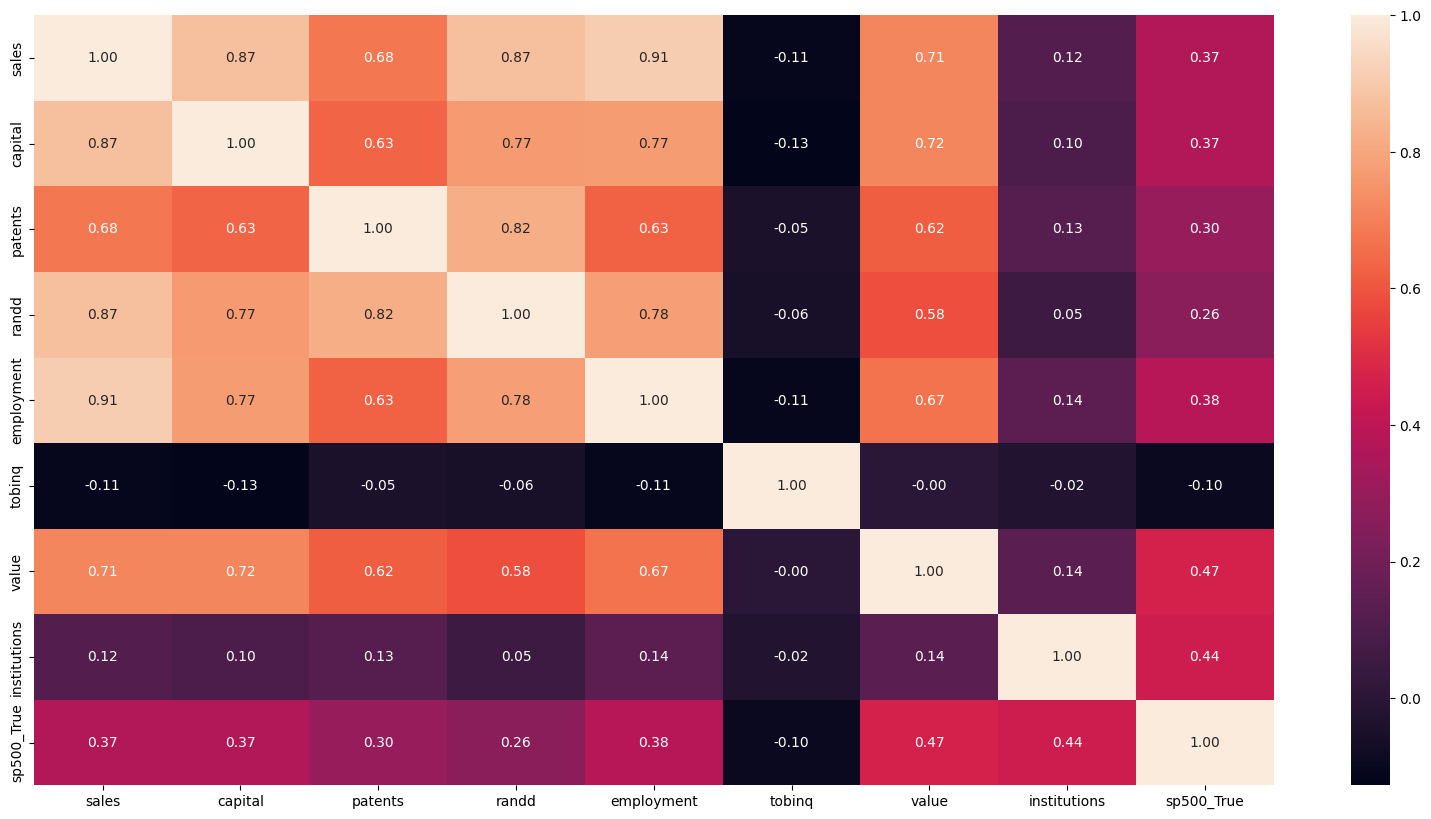

In [16]:
plt.figure(figsize = (20,10))
sns.heatmap(firm_df.corr(), annot=True,fmt='.2f');

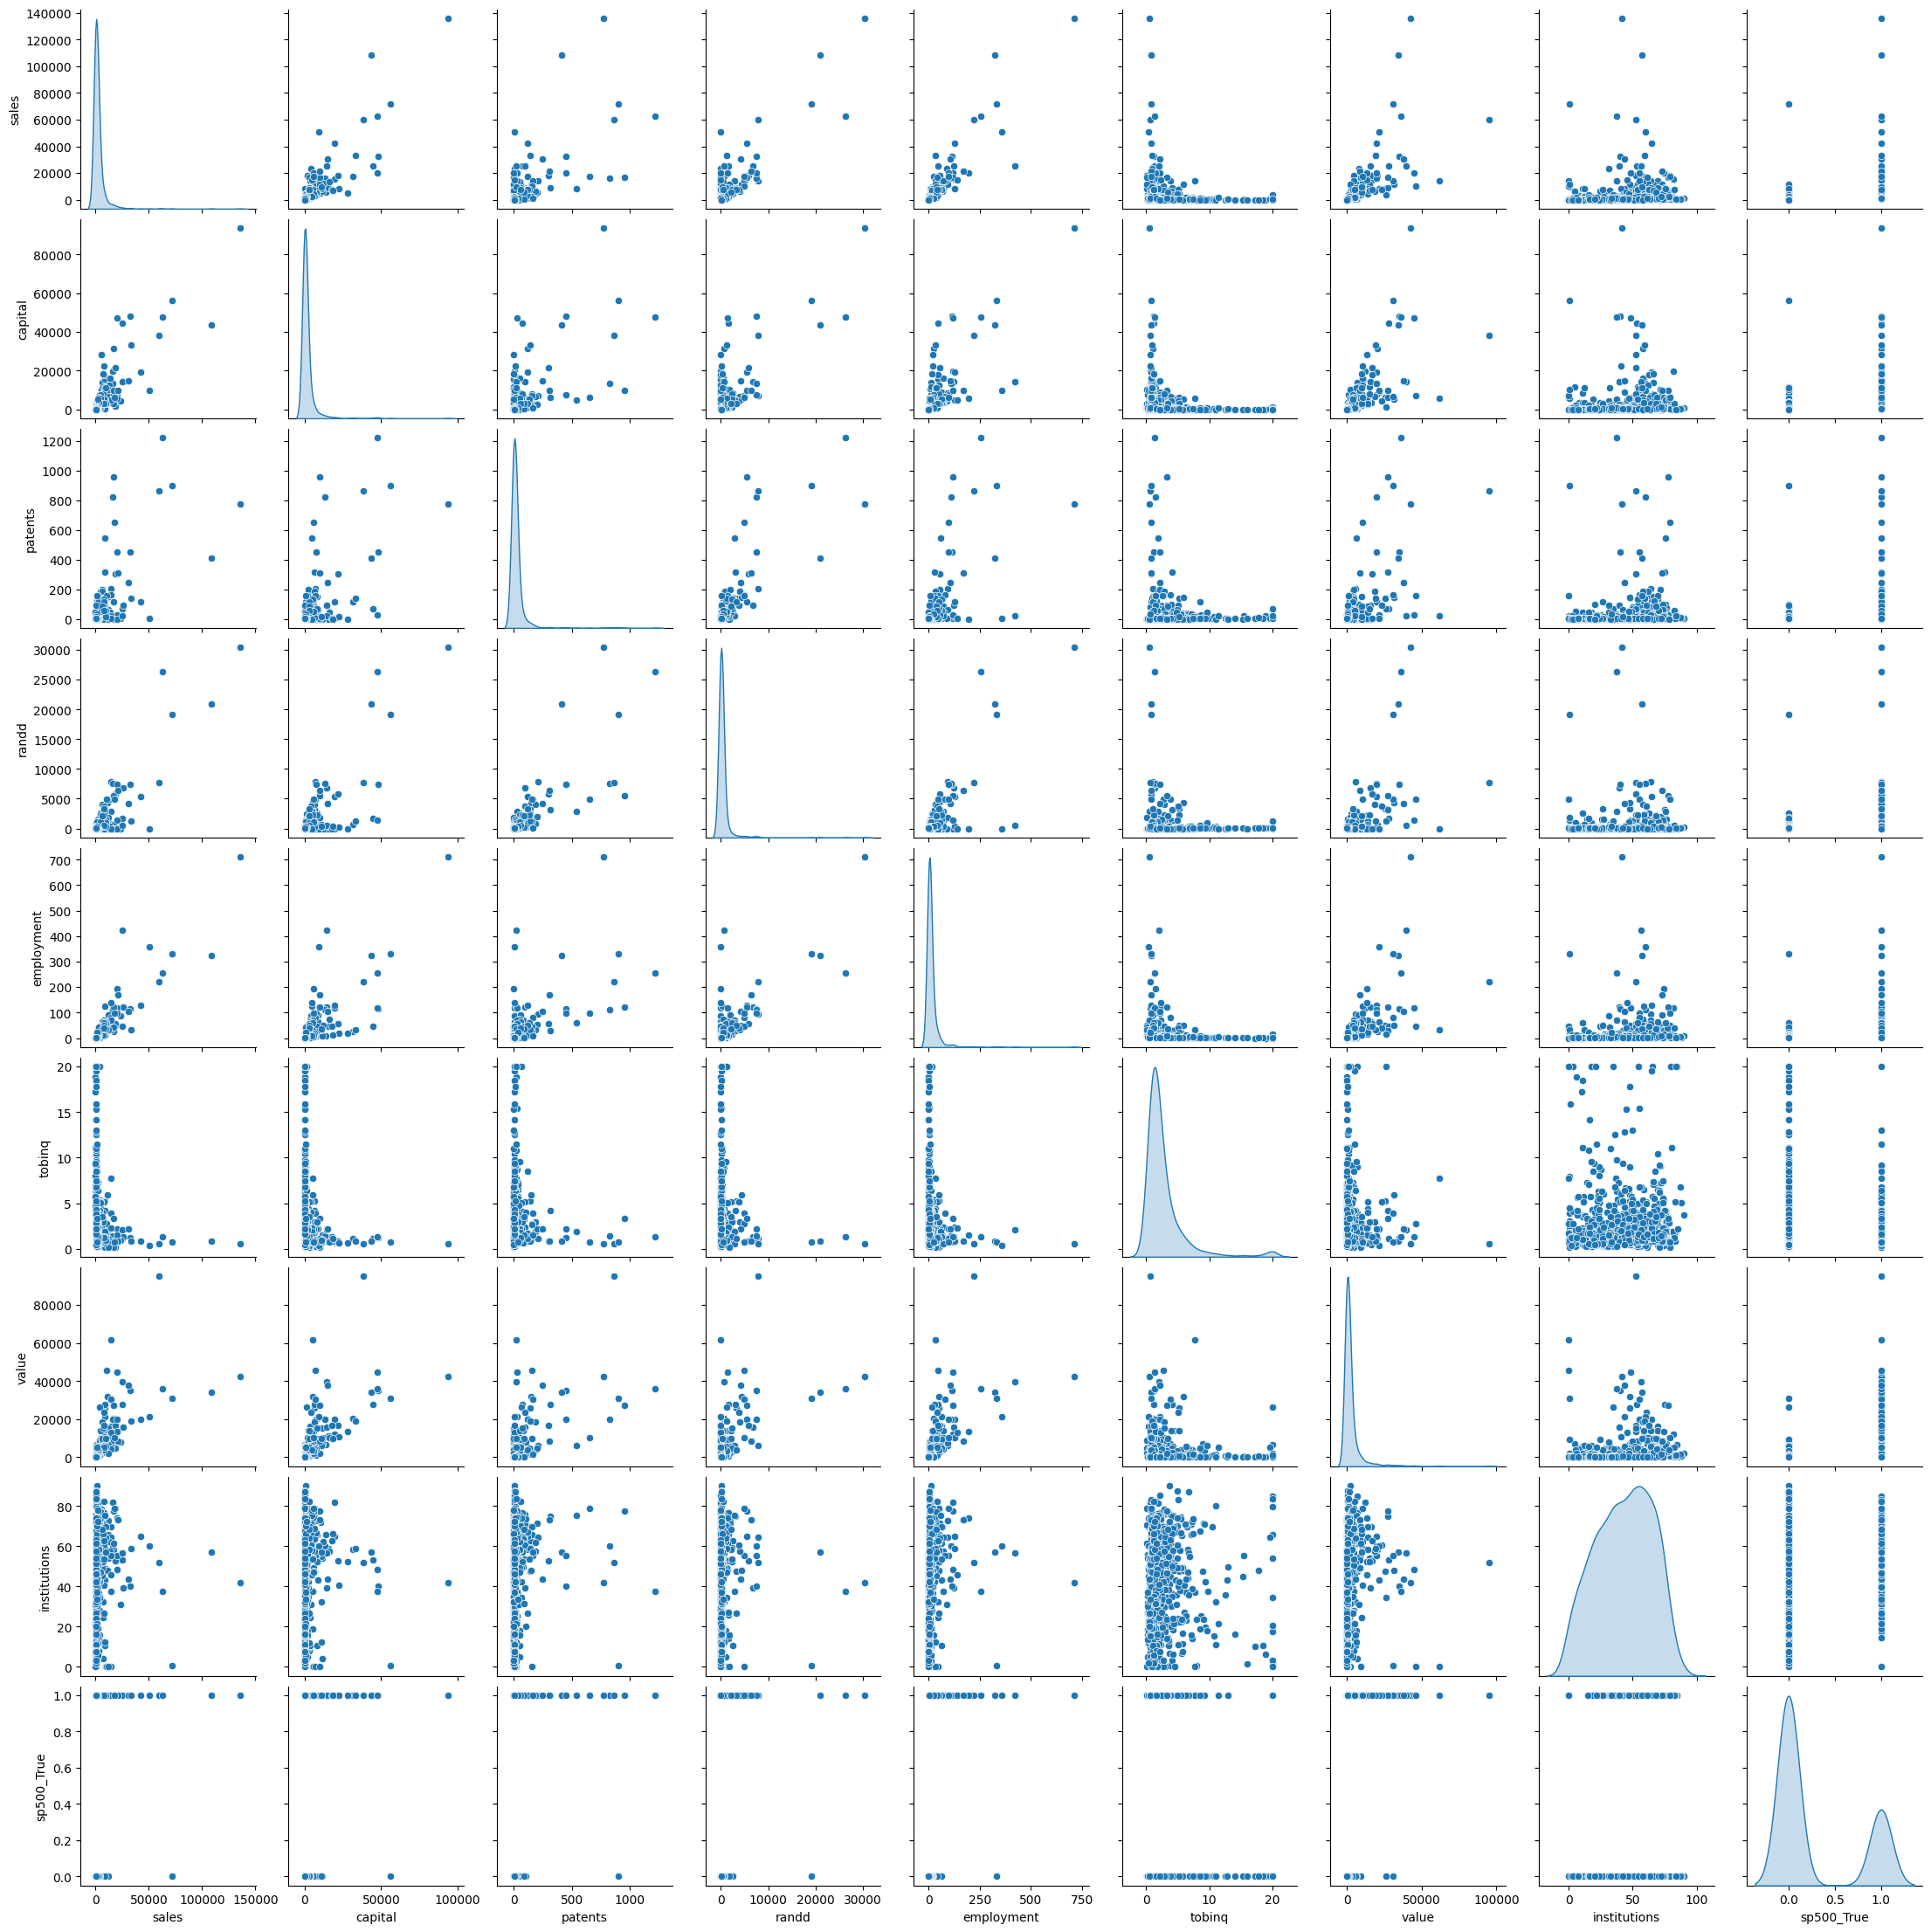

In [17]:
firm_df_attr = firm_df.iloc[:, 0:10]
sns.pairplot(firm_df_attr, diag_kind="kde")

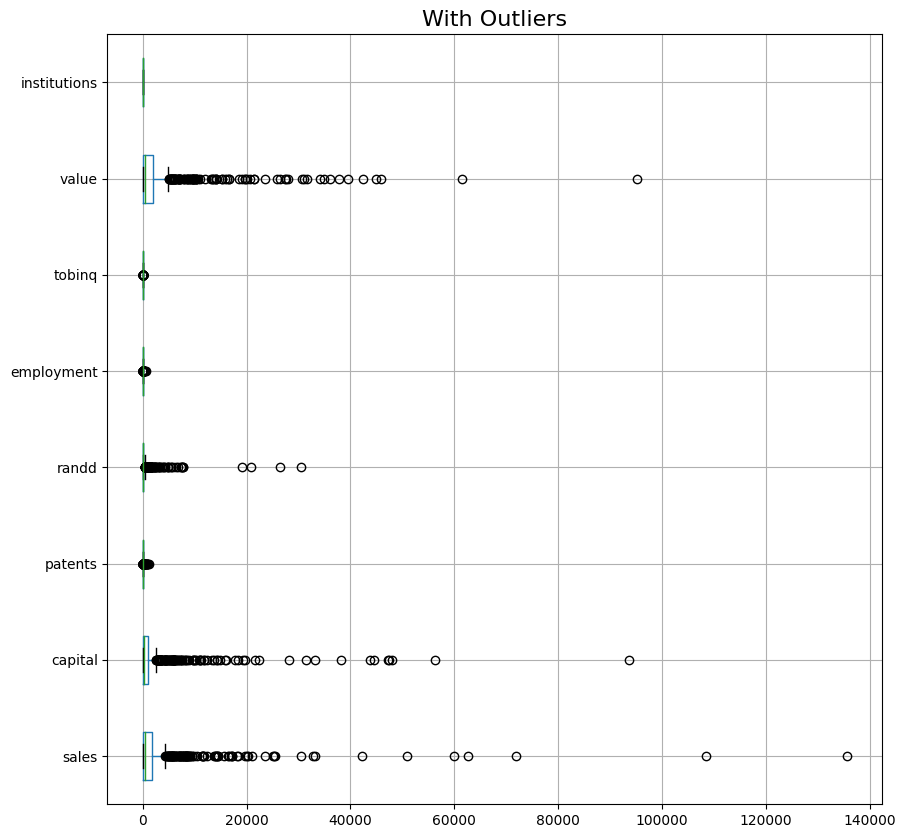

In [18]:
cont = firm_df.dtypes[(firm_df.dtypes!='uint8') & (firm_df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
firm_df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [19]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [20]:
for column in firm_df[cont].columns:
    lr,ur=remove_outlier(firm_df[column])
    firm_df[column]=np.where(firm_df[column]>ur,ur,firm_df[column])
    firm_df[column]=np.where(firm_df[column]<lr,lr,firm_df[column])

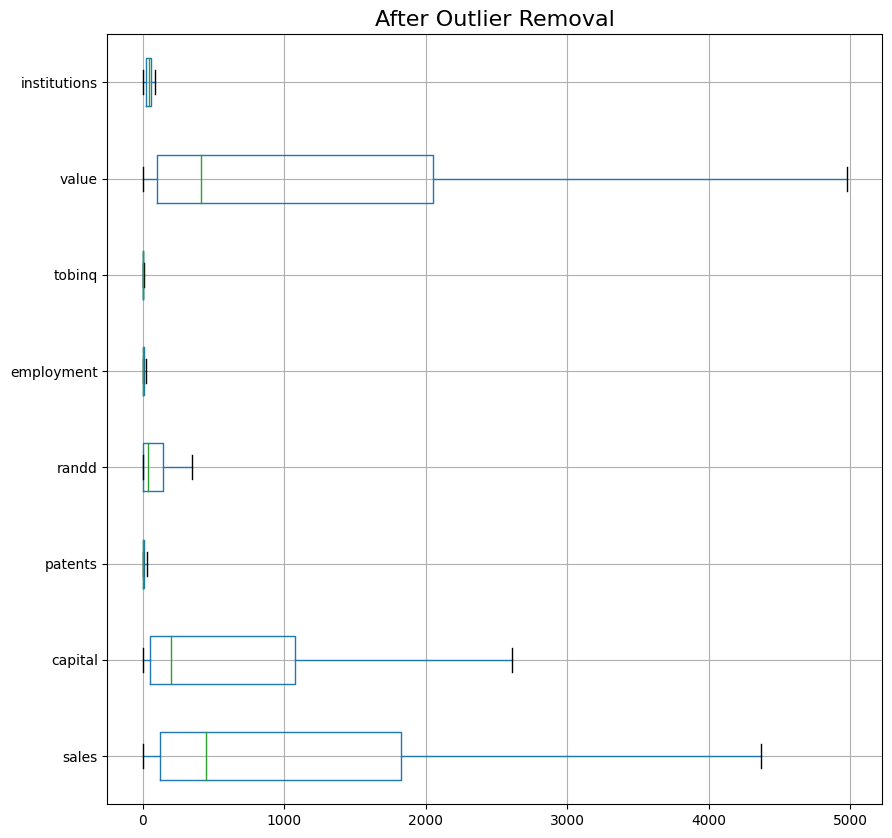

In [21]:
plt.figure(figsize=(10,10))
firm_df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [22]:
firm_df.skew()

sales           1.189942
capital         1.190265
patents         1.162219
randd           1.162978
employment      1.186553
tobinq          1.101202
value           1.195849
institutions   -0.168071
sp500_True      0.949540
dtype: float64

In [23]:
np.isinf(firm_df).sum()

sales           0
capital         0
patents         0
randd           0
employment      0
tobinq          0
value           0
institutions    0
sp500_True      0
dtype: int64

In [24]:
# independent variables
X = firm_df.drop(["sales"], axis=1)
# dependent variable
y = firm_df[["sales"]]

In [25]:
X = sm.add_constant(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [28]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [29]:
for idx, col_name in enumerate(X_train.columns):
  print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for const is 0.0
The coefficient for capital is 0.40506318958638654
The coefficient for patents is -4.662155360973143
The coefficient for randd is 0.6385380676844679
The coefficient for employment is 78.5649706784115
The coefficient for tobinq is -40.9832945074053
The coefficient for value is 0.24554026456936773
The coefficient for institutions is 0.21287605645780297
The coefficient for sp500_True is 167.87266107738878


In [30]:
print(X_train.head())

     const      capital  patents      randd  employment    tobinq  \
626    1.0  1315.696256     15.0  73.275818   16.472000  1.657513   
333    1.0    15.258002      2.0   9.252643    0.566000  0.381755   
257    1.0   538.188036     20.0  87.388641    6.627000  2.126738   
173    1.0   807.215091      0.0  68.900185    7.607001  3.151469   
242    1.0   402.508010      2.0   0.000000    1.550000  2.154388   

           value  institutions  sp500_True  
626  2231.870118         31.47           0  
333     9.877838         21.69           0  
257  1019.443780         69.64           0  
173  2221.768944         69.69           1  
242   358.040202         85.42           0  


In [31]:
print(X_test.head())

     const      capital  patents      randd  employment    tobinq  \
480    1.0    50.688001      1.0  47.173386    1.147000  1.006168   
622    1.0    80.960002      3.0  50.251263    3.400000  1.259892   
638    1.0  1119.000008     19.0  78.623947   18.988003  1.900413   
389    1.0    68.742010      3.0  44.827785    1.204000  2.262480   
748    1.0   308.770949      2.0  79.026939    3.264000  1.741800   

           value  institutions  sp500_True  
480    34.516077         34.92           0  
622   164.840772         18.88           0  
638  2114.826950         47.94           1  
389    82.287341         24.65           0  
748   533.056000         16.05           0  


In [32]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [33]:
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     953.8
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          7.27e-306
Time:                        17:43:51   Log-Likelihood:                -3927.4
No. Observations:                 531   AIC:                             7873.
Df Residuals:                     522   BIC:                             7911.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           73.7353     48.629      1.516   

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const           7.938418
capital         5.664888
patents         2.657957
randd           2.943611
employment      5.263343
tobinq          1.426519
value           6.706013
institutions    1.286667
sp500_True      3.051598
dtype: float64



In [35]:
X_train2 = X_train.drop(["value"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.925 
Adjusted R-squared: 0.924


In [36]:
X_train3 = X_train.drop(["capital"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.925 
Adjusted R-squared: 0.924


In [37]:
X_train4 = X_train.drop(["employment"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.903 
Adjusted R-squared: 0.901


In [38]:
X_train5 = X_train.drop(["sp500_True"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train5)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.935 
Adjusted R-squared: 0.934


In [39]:
X_train = X_train.drop(["sp500_True"], axis=1)
#since on dropping 'sp500_True', there is no significant decrease in R-squared value

In [40]:
olsmod_5 = sm.OLS(y_train, X_train)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1078.
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          5.08e-306
Time:                        17:48:21   Log-Likelihood:                -3930.6
No. Observations:                 531   AIC:                             7877.
Df Residuals:                     523   BIC:                             7911.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           54.6017     48.283      1.131   

In [41]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const           7.745891
capital         5.663345
patents         2.644069
randd           2.941294
employment      4.985073
tobinq          1.426013
value           6.196263
institutions    1.244930
dtype: float64



In [42]:
X_train6 = X_train.drop(["value"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train6)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.921 
Adjusted R-squared: 0.92


In [43]:
X_train7 = X_train.drop(["capital"], axis=1)
olsmod_7 = sm.OLS(y_train, X_train7)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)

R-squared: 0.924 
Adjusted R-squared: 0.923


In [44]:
X_train8 = X_train.drop(["employment"], axis=1)
olsmod_8 = sm.OLS(y_train, X_train8)
olsres_8 = olsmod_8.fit()
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)

R-squared: 0.897 
Adjusted R-squared: 0.896


In [46]:
X_train = X_train.drop(["capital"], axis=1)

In [47]:
olsmod_9 = sm.OLS(y_train, X_train)
olsres_9 = olsmod_9.fit()
print(olsres_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1057.
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          5.59e-289
Time:                        17:53:16   Log-Likelihood:                -3974.0
No. Observations:                 531   AIC:                             7962.
Df Residuals:                     524   BIC:                             7992.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          188.3234     50.144      3.756   

In [48]:
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const           7.106948
patents         2.634392
randd           2.928804
employment      4.586516
tobinq          1.215751
value           3.838580
institutions    1.240969
dtype: float64



In [49]:
X_train10 = X_train.drop(["employment"], axis=1)
olsmod_10 = sm.OLS(y_train, X_train10)
olsres_10 = olsmod_10.fit()
print(
    "R-squared:",
    np.round(olsres_10.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_10.rsquared_adj, 3),
)

R-squared: 0.869 
Adjusted R-squared: 0.867


In [50]:
X_train11 = X_train.drop(["value"], axis=1)
olsmod_11 = sm.OLS(y_train, X_train11)
olsres_11 = olsmod_11.fit()
print(
    "R-squared:",
    np.round(olsres_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_11.rsquared_adj, 3),
)

R-squared: 0.868 
Adjusted R-squared: 0.867


In [51]:
#As by dropping employment and value, there is significant fall in the r-squared value. We will retain this variables.
#While as observed in model above (olsres_9), 'institutions' & 'patents' has p-value greater than 0.05. So we can drop one.

In [52]:
X_train12 = X_train.drop(["institutions"], axis=1)
olsmod_12 = sm.OLS(y_train, X_train12)
olsres_12 = olsmod_12.fit()
print(olsres_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1270.
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          1.51e-290
Time:                        17:57:18   Log-Likelihood:                -3974.0
No. Observations:                 531   AIC:                             7960.
Df Residuals:                     525   BIC:                             7986.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        192.9331     38.432      5.020      0.0

In [54]:
# patents, randd, employment, tobinq and value are 5 most important variables

In [55]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_12.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_12.resid.values  # residuals

df_pred.head()


,Actual Values,Fitted Values,Residuals
0,1947.224100,2486.890077,-539.665977
1,60.327997,213.225009,-152.897011
2,1065.748032,1005.875626,59.872406
3,1193.647768,1602.155031,-408.507263
4,164.135025,288.004708,-123.869684


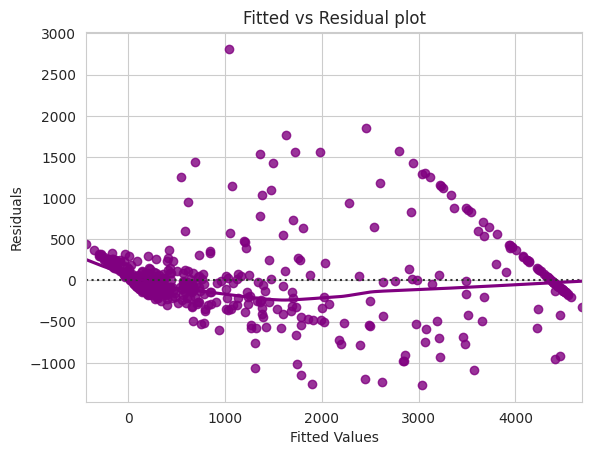

In [56]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [57]:
X_train12.columns

Index(['const', 'patents', 'randd', 'employment', 'tobinq', 'value'], dtype='object')

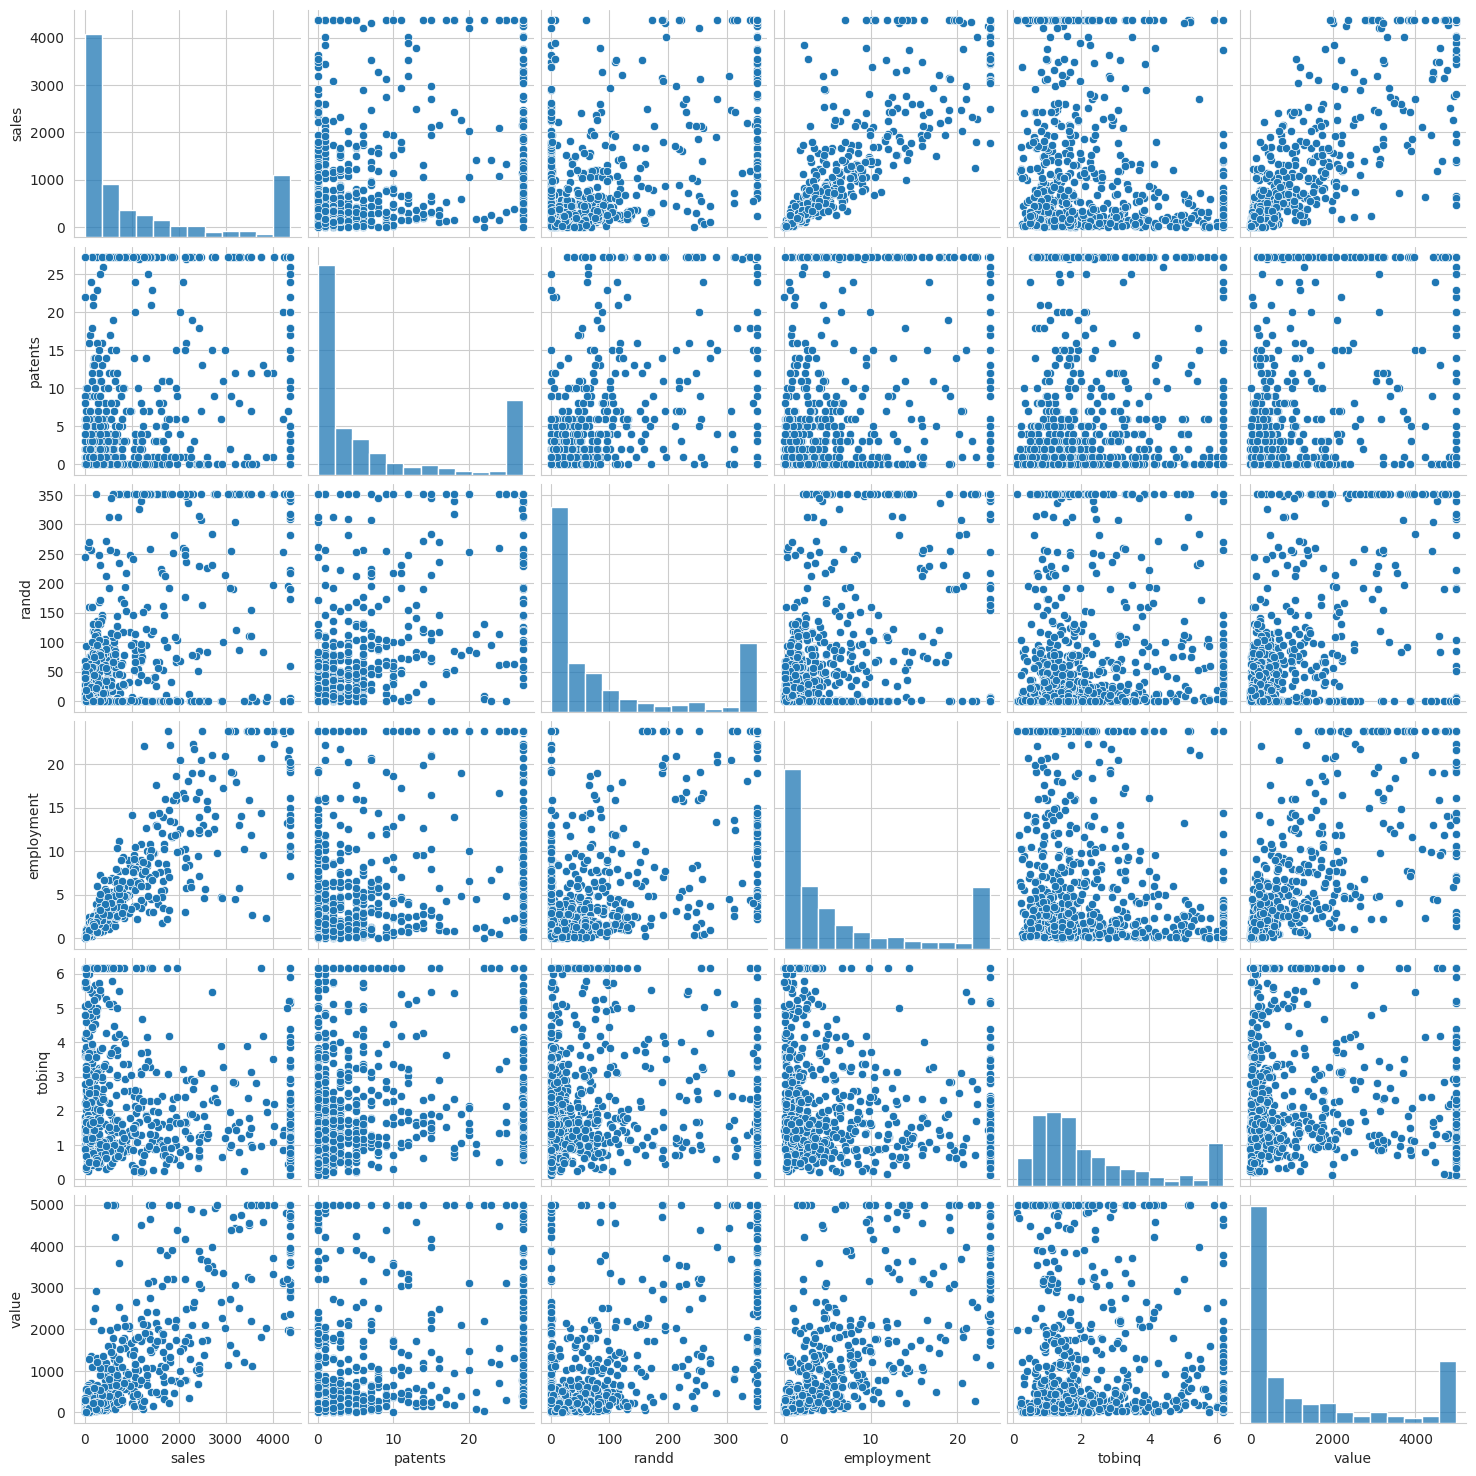

In [58]:
# checking the distribution of variables in training set with dependent variable
sns.pairplot(firm_df[['sales', 'patents', 'randd', 'employment', 'tobinq', 'value']])
plt.show()

In [59]:
# using square transformation
X_train12["employment_sq"] = np.square(X_train12["employment"])

# let's create a model with the transformed data
olsmod_13 = sm.OLS(y_train, X_train12)
olsres_13 = olsmod_13.fit()
print(olsres_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1057.
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          5.56e-289
Time:                        18:03:15   Log-Likelihood:                -3974.0
No. Observations:                 531   AIC:                             7962.
Df Residuals:                     524   BIC:                             7992.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           188.5243     45.489      4.144

In [60]:
# using square transformation
X_train13[['employment_sq', 'value_sq']] = np.square(X_train13[['employment', 'value']])

# let's create a model with the transformed data
olsmod_14 = sm.OLS(y_train, X_train13)
olsres_14 = olsmod_14.fit()
print(olsres_14.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     903.1
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          2.47e-287
Time:                        18:05:50   Log-Likelihood:                -3974.3
No. Observations:                 531   AIC:                             7965.
Df Residuals:                     523   BIC:                             7999.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           213.8590     53.820      3.974

In [61]:
# let us recreate the dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_14.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_14.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,1947.224100,2584.895779,-637.671679
1,60.327997,223.075152,-162.747155
2,1065.748032,1084.871869,-19.123837
3,1193.647768,1607.291367,-413.643599
4,164.135025,278.717010,-114.581985


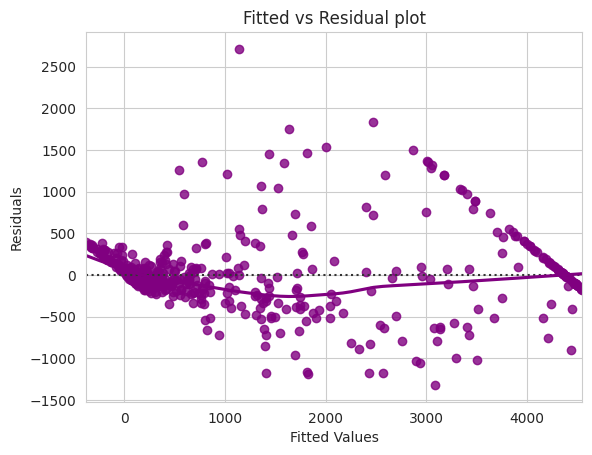

In [62]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

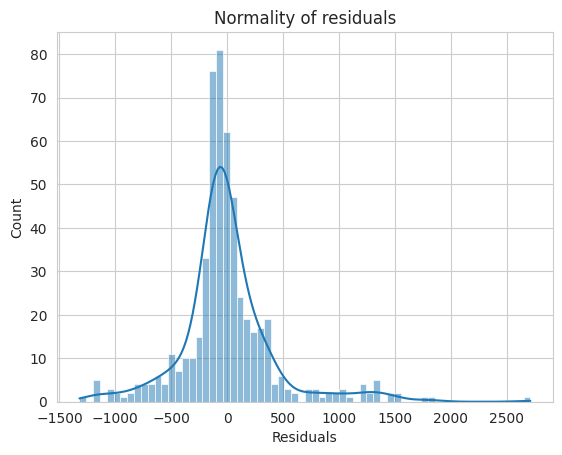

In [63]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

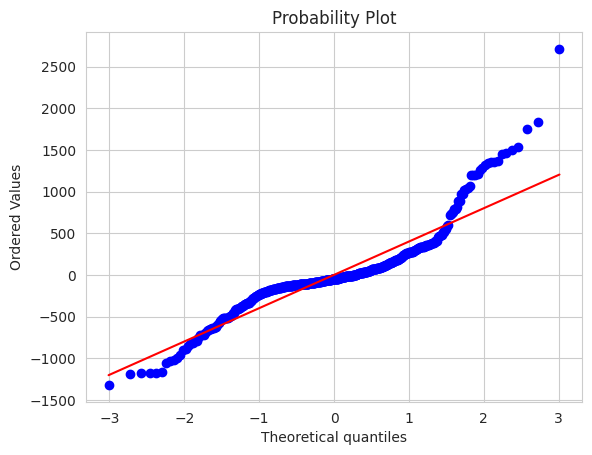

In [64]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [65]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.8576362729072571, pvalue=1.5985731838372171e-21)

In [66]:
X_train13.columns

Index(['const', 'randd', 'employment', 'tobinq', 'value', 'institutions',
       'employment_sq', 'value_sq'],
      dtype='object')

In [67]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [68]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train13)
lzip(name, test)

[('F statistic', 0.7328374233215105), ('p-value', 0.9935440220465495)]

In [ ]:
# Since p-value > 0.05 we can say that the residuals are homoscedastic.

In [71]:
print(olsres_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1270.
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          1.51e-290
Time:                        18:11:49   Log-Likelihood:                -3974.0
No. Observations:                 531   AIC:                             7960.
Df Residuals:                     525   BIC:                             7986.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        192.9331     38.432      5.020      0.0

In [73]:
# let's check the model parameters
olsres_14.params

const            213.858991
randd              0.470189
employment        81.357858
tobinq           -96.554788
value              0.520042
institutions      -0.442178
employment_sq      0.416189
value_sq          -0.000021
dtype: float64

In [74]:
# Let us write the equation of linear regression
Equation = "sales ="
print(Equation, end=" ")
for i in range(len(X_train13.columns)):
    if i == 0:
        print(olsres_14.params[i], "+", end=" ")
    elif i != len(X_train13.columns) - 1:
        print(
            olsres_14.params[i],
            "* (",
            X_train13.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_14.params[i], "* (", X_train13.columns[i], ")")

sales = 213.8589913998946 + 0.4701890468749305 * ( randd ) +  81.35785809887733 * ( employment ) +  -96.55478849271469 * ( tobinq ) +  0.5200421787273133 * ( value ) +  -0.4421776476760601 * ( institutions ) +  0.41618902385020135 * ( employment_sq ) +  -2.0713096299827497e-05 * ( value_sq )


In [ ]:
# We can now use the model for making predictions on the test data.

In [75]:
X_train13.columns

Index(['const', 'randd', 'employment', 'tobinq', 'value', 'institutions',
       'employment_sq', 'value_sq'],
      dtype='object')

In [76]:
X_test.columns

Index(['const', 'capital', 'patents', 'randd', 'employment', 'tobinq', 'value',
       'institutions', 'sp500_True'],
      dtype='object')

In [77]:
# dropping columns from the test data that are not there in the training data
X_test2 = X_test.drop(["capital", "patents", "sp500_True"], axis=1)

In [78]:
# transforming the employment and capital columns in the test data corresponding to the training set
X_test2[["employment_sq", "value_sq"]] = np.square(X_test2[["employment", "value"]])

In [79]:
# let's make predictions on the test set
y_pred = olsres_14.predict(X_test2)

In [80]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

430.7857740317695

In [81]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

413.3252049709671

In [82]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"])
mae1

267.7447409390677

In [83]:
# let's check the MAE on the test data
mae2 = mean_absolute_error(y_test, y_pred)
mae2

257.7707843387328